In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [5]:
# Load the data
AoTi = pd.read_csv('./air_quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
AoTi['datetime'] = pd.to_datetime(AoTi[['year', 'month', 'day', 'hour']])
AoTi = AoTi.dropna()
AoTi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


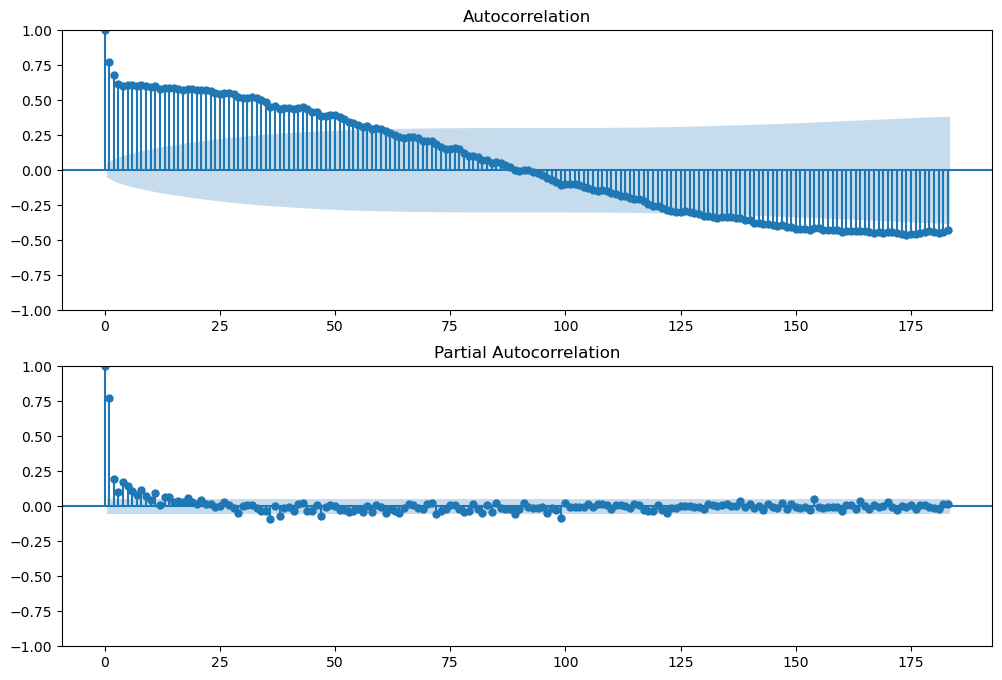

In [42]:
o3 = AoTi[['datetime', 'O3']]
o3_daily = o3.copy().set_index('datetime').resample('D').mean().reset_index().dropna()

# Plot the acf and pacf
fig, ax = plt.subplots(2,1, figsize=(12,8))
sm.tsa.graphics.plot_acf(o3_daily['O3'], lags=183, ax=ax[0])
sm.tsa.graphics.plot_pacf(o3_daily['O3'], lags=183, ax=ax[1])
plt.show()

In [58]:
o3_daily['o3_diff1'] = o3_daily['O3'].diff()
o3_daily['o3_diff2'] = o3_daily['o3_diff1'].diff()
o3_daily.head()


,datetime,O3,o3_diff1,o3_diff2
0,2013-03-01,63.875000,NaN,NaN
1,2013-03-02,29.750000,-34.125000,NaN
2,2013-03-03,19.125000,-10.625000,23.500000
3,2013-03-04,52.523810,33.398810,44.023810
4,2013-03-05,68.458333,15.934524,-17.464286


f:\ComputerSciEnv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\ComputerSciEnv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\ComputerSciEnv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\ComputerSciEnv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

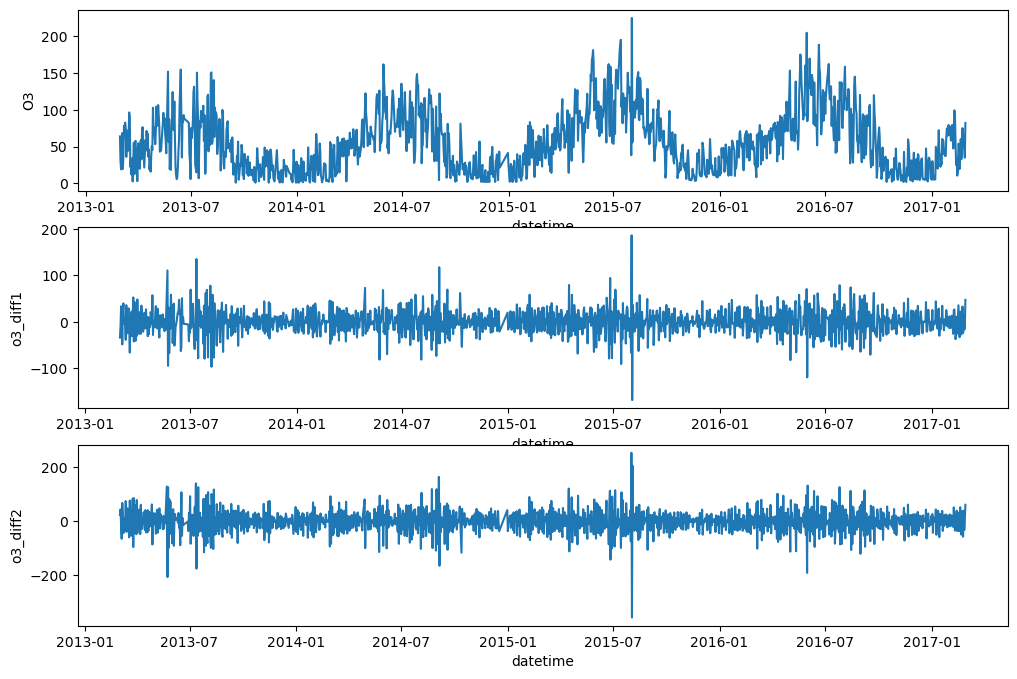

In [59]:
fig, ax = plt.subplots(3,1, figsize=(12,8))
for i in range(1, 4):
    sns.lineplot(x='datetime', y=o3_daily.columns[i], data=o3_daily, ax=ax[i-1])

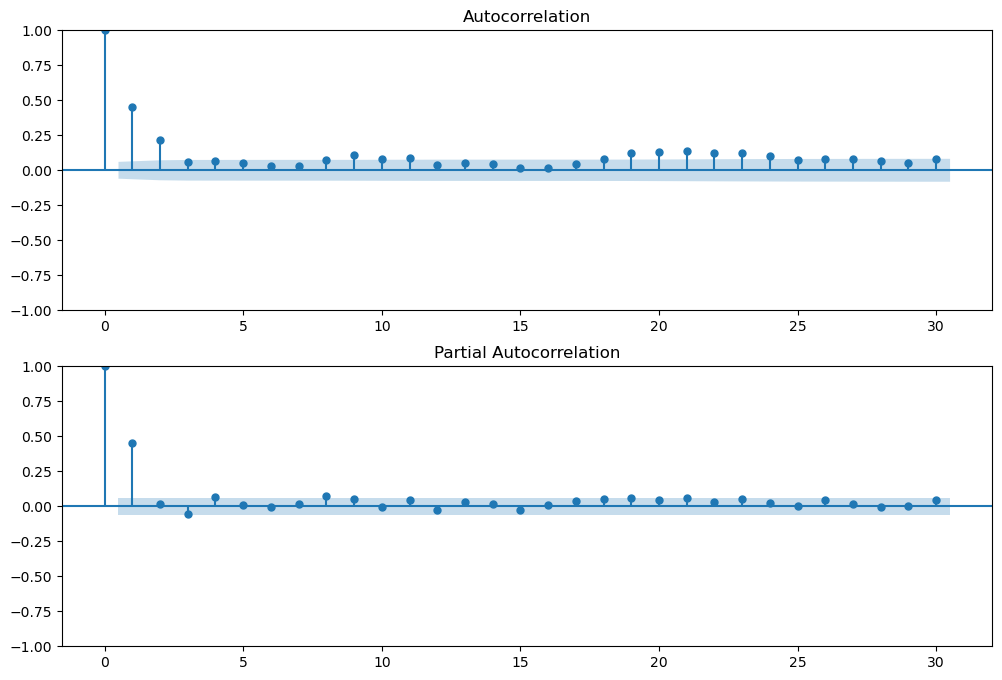

In [57]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
sm.tsa.graphics.plot_acf(o3_daily['o3_diff1'].dropna(), lags=30, ax=ax[0])
sm.tsa.graphics.plot_pacf(o3_daily['o3_diff1'].dropna(), lags=30, ax=ax[1])
plt.show()